In [1597]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


In [1598]:
#loading file and reading top 5 rows
data=pd.read_csv('customers (1).csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [1599]:
#checking columns data type and null values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [1600]:
#checking null values %
data.isnull().sum()/len(data)*100

ID                  0.000000
Gender              0.000000
Ever_Married        1.903312
Age                 0.000000
Graduated           0.913590
Profession          1.446517
Work_Experience    10.239817
Spending_Score      0.000000
Family_Size         4.301485
Var_1               1.218120
dtype: float64

In [1601]:
#Filling null with mode because of categorical features
null_col=['Ever_Married','Graduated','Profession','Work_Experience','Family_Size']
for col in null_col:
    data[col]=data[col].fillna(data[col].mode()[0])#[0] to choose first mode if we have multiple modes.

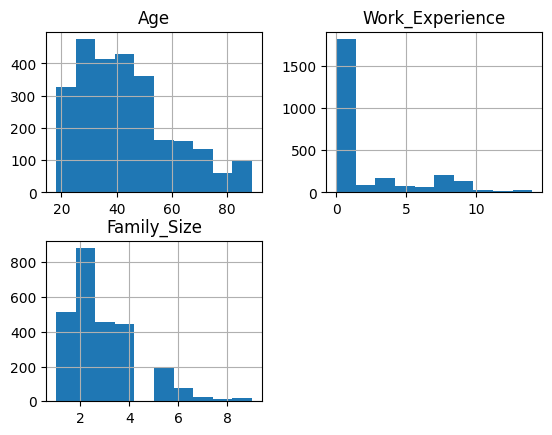

In [1602]:
# viewing data distribution of numerical colums
data[['Age', 'Work_Experience', 'Family_Size']].hist();

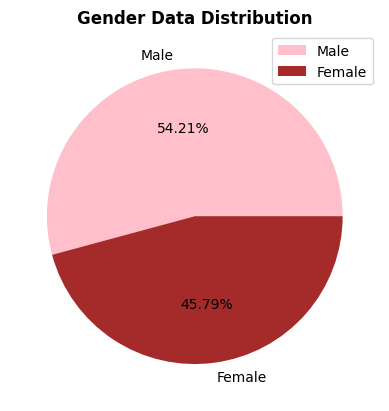

In [1603]:
#showing data distribution of Gender column

data_gender= data.Gender.value_counts().reset_index()
plt.pie(data_gender['count'], labels=data_gender.Gender, autopct='%1.2f%%', colors=['pink','brown'])
plt.title('Gender Data Distribution', fontweight='bold')
plt.legend();

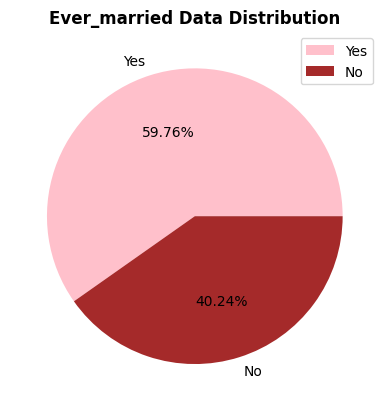

In [1604]:
#showing data distribution of Ever_Married column
data_m= data.Ever_Married.value_counts().reset_index()
plt.pie(data_m['count'], labels=data_m.Ever_Married, autopct='%1.2f%%', colors=['pink','brown'])
plt.title('Ever_married Data Distribution', fontweight='bold')
plt.legend();

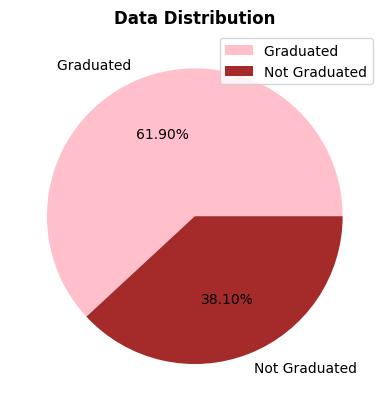

In [1605]:
#showing data distribution of Graduated column
data_gra= data.Graduated.value_counts().reset_index()
data_gra
plt.pie(data_gra['count'], labels=['Graduated ', 'Not Graduated'], autopct='%1.2f%%', colors=['pink','brown'])
plt.title('Data Distribution', fontweight='bold')
plt.legend(loc='upper right');

In [1606]:
# Plotting bar graph for Spending_Score
spending=data.Spending_Score.value_counts().reset_index()
spending

,Spending_Score,count
0,Low,1616
1,Average,625
2,High,386


Text(0, 0.5, 'Count')

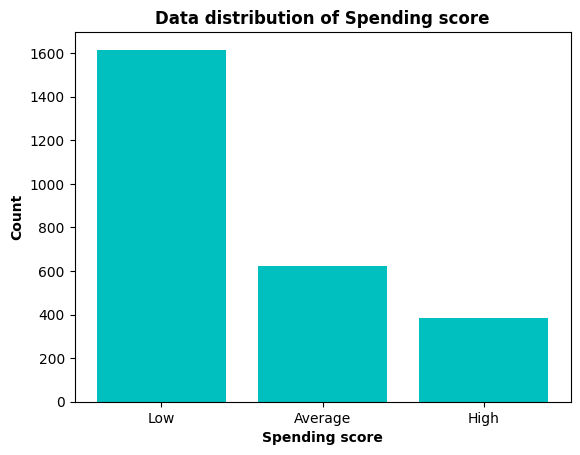

In [1607]:
plt.bar(spending.Spending_Score,spending['count'], color='c')
plt.title('Data distribution of Spending score', fontweight='bold')
plt.xlabel('Spending score',fontweight='bold')
plt.ylabel('Count',fontweight='bold')

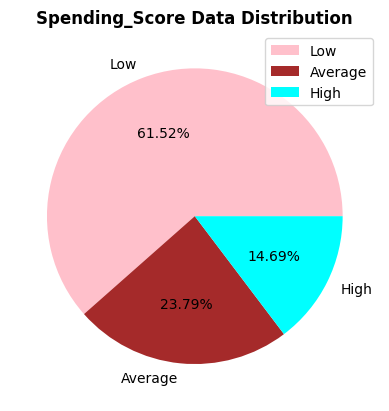

In [1608]:
# Making pie chart to show percentage of spending score
plt.pie(spending['count'], labels=spending.Spending_Score, autopct='%1.2f%%', colors=['pink','brown', 'cyan'])
plt.title('Spending_Score Data Distribution', fontweight='bold')
plt.legend();

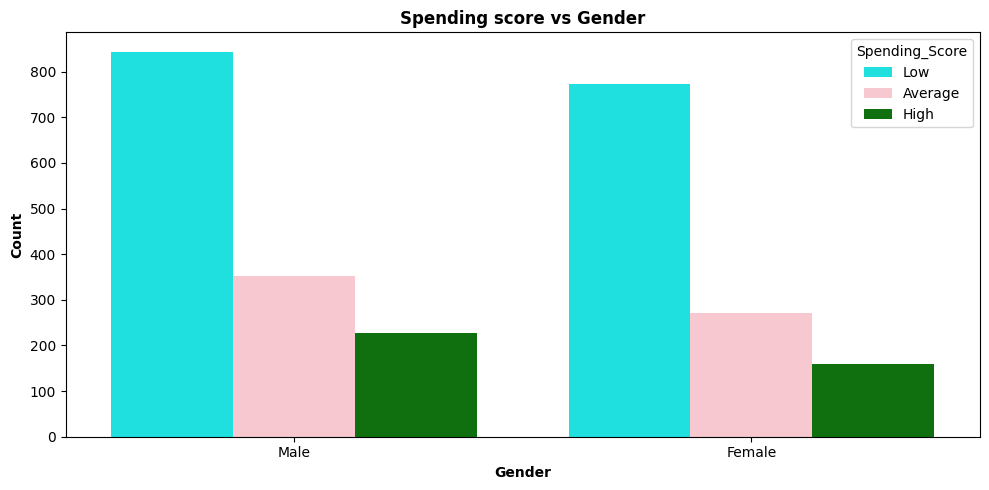

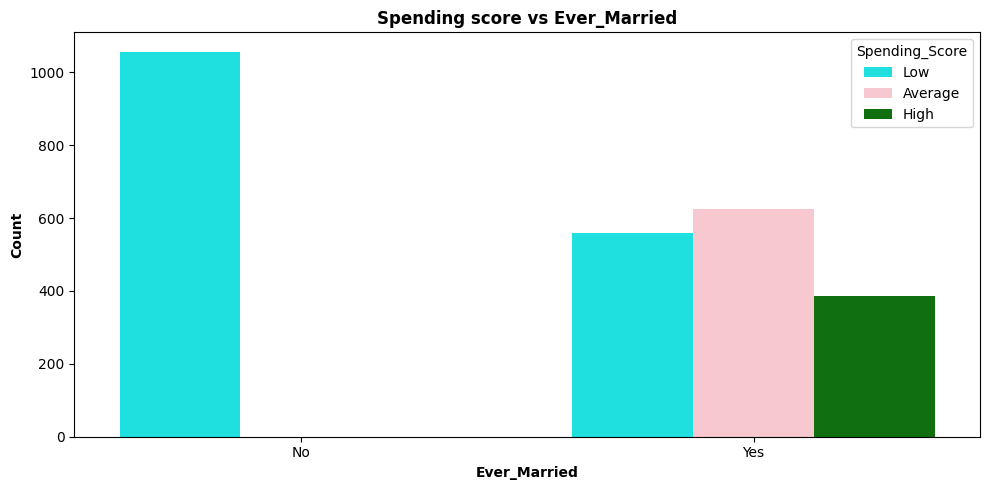

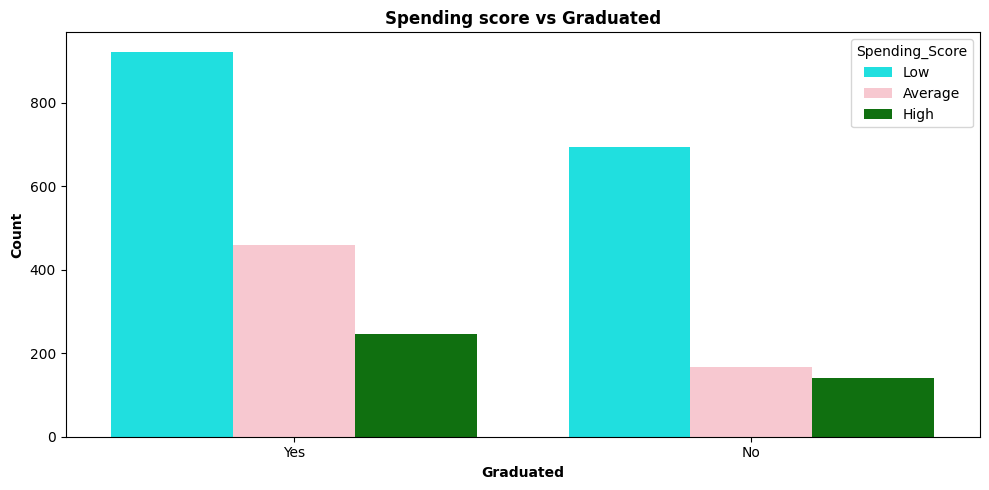

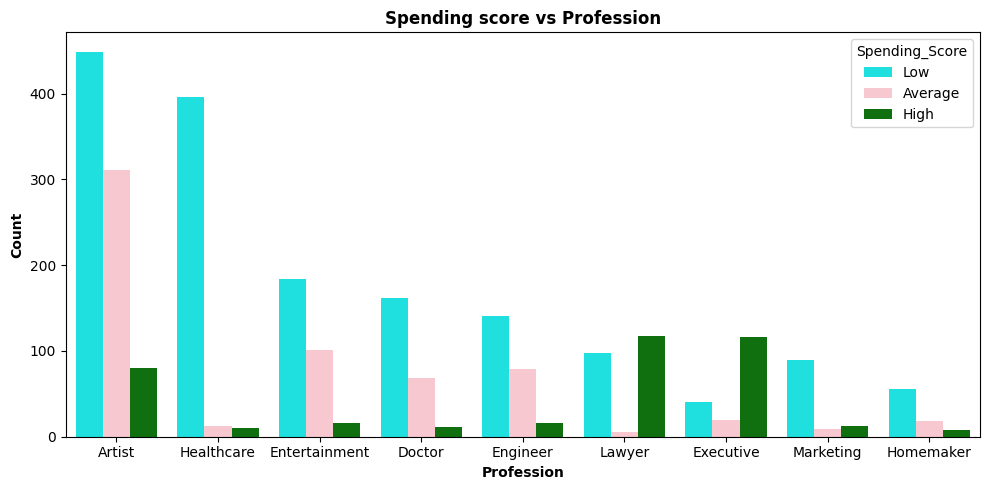

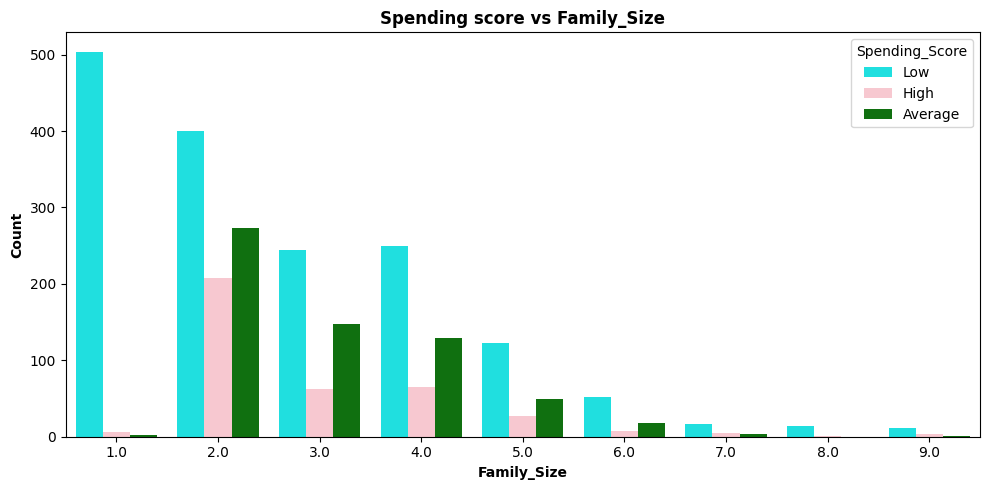

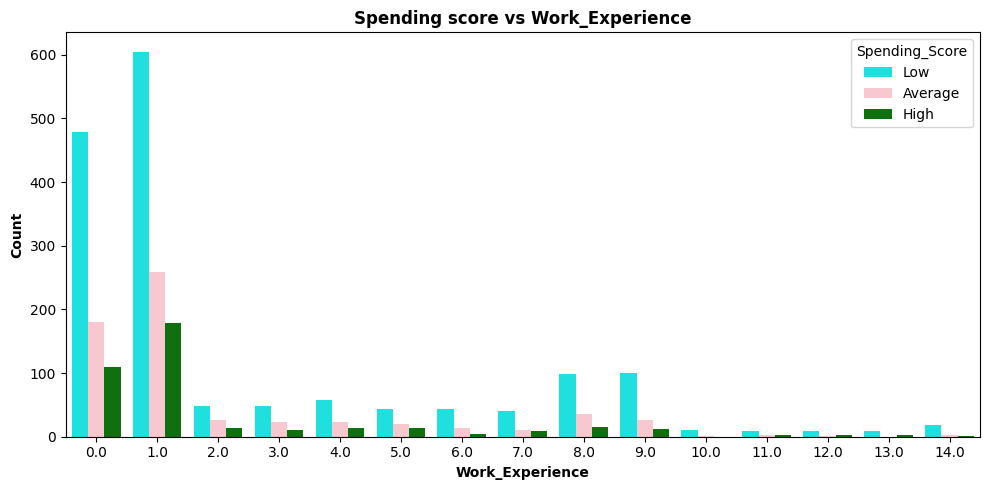

In [1609]:
#plotting Spending_Score vs difeerent features to understand the relation between them
data_frames=[]
feature_col=['Gender','Ever_Married','Graduated','Profession','Family_Size','Work_Experience']
for i in range(len(feature_col)):
    data_all=data[[feature_col[i], 'Spending_Score']].value_counts().reset_index()
    data_frames.append(data_all)

    plt.figure(figsize=(10,5))

    sns.barplot(data=data_all, x=feature_col[i], y='count', hue='Spending_Score', palette=["cyan","pink",'green'])
    plt.title(f'Spending score vs {feature_col[i]}', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.xlabel(feature_col[i], fontweight='bold')
    plt.tight_layout()
    plt.show()


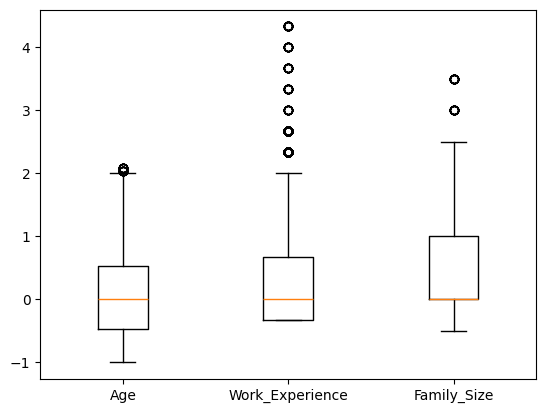

In [1610]:
#boxplot to see outliers
plt.boxplot(df[['Age', 'Work_Experience', 'Family_Size']])
plt.xticks([1,2,3], ['Age', 'Work_Experience', 'Family_Size']);

In [1611]:
#making column list for interested features
wanted_column=['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience', 'Spending_Score', 'Family_Size']
df=data[wanted_column]
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,Female,Yes,69,No,Artist,0.0,Low,1.0
3,Male,Yes,59,No,Executive,11.0,High,2.0
4,Female,No,19,No,Marketing,1.0,Low,4.0
...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0
2624,Female,No,53,Yes,Entertainment,1.0,Low,2.0
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0


In [1612]:
# level encode catagorical colums into numerical columns
enco=LabelEncoder()
column_encode=['Gender','Ever_Married','Graduated','Profession','Spending_Score']
for item in  column_encode:
    df.loc[:,item]=enco.fit_transform(df.loc[:,item])

In [1613]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,36,1,2,0.0,2,1.0
1,1,1,37,1,5,8.0,0,4.0
2,0,1,69,0,0,0.0,2,1.0
3,1,1,59,0,4,11.0,1,2.0
4,0,0,19,0,8,1.0,2,4.0
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,9.0,2,4.0
2623,0,0,35,1,1,1.0,2,1.0
2624,0,0,53,1,3,1.0,2,2.0
2625,1,1,47,1,4,1.0,1,5.0


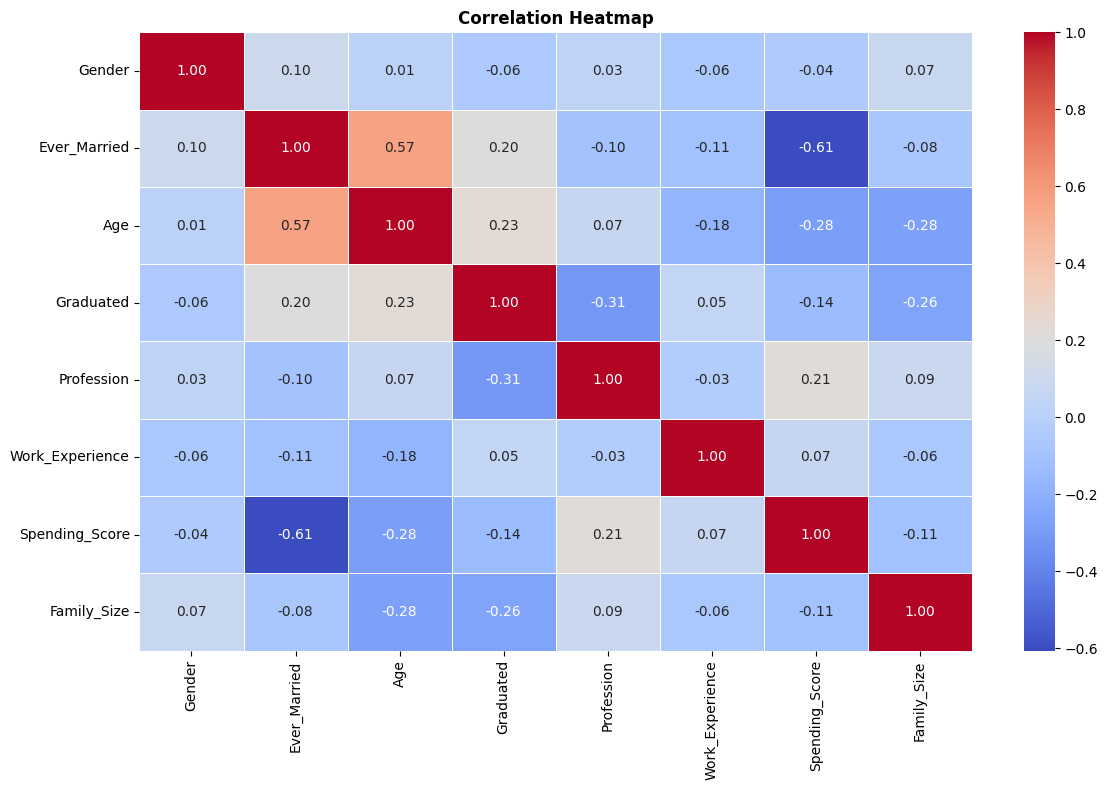

In [1614]:

# making correlation matrix
# 1. Set up the figure size
plt.figure(figsize=(12, 8))

# 2. Create the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 3. Title
plt.title('Correlation Heatmap', fontweight='bold')
plt.tight_layout()

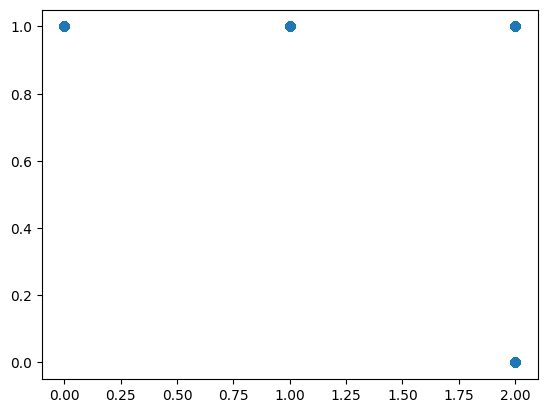

In [ ]:
#correlation matrix showing correlation between Spending_Score and Ever_Married thus making ascatter plot

plt.scatter(df.Spending_Score, df.Ever_Married)

Text(0.5, 1.0, 'Scatter plot (Ever_married vs Age)')

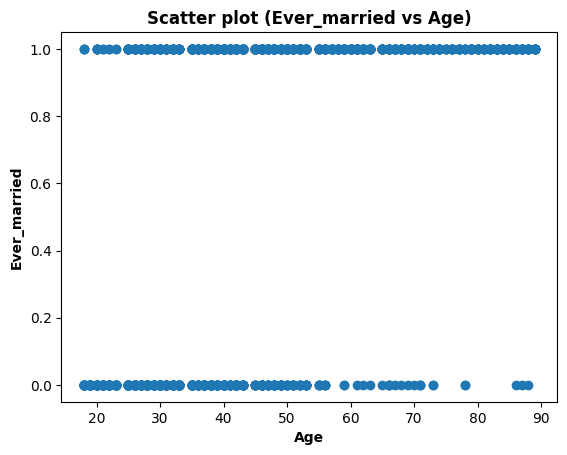

In [ ]:
#making scatter plot of Age and Ever_Married
plt.scatter(df.Age,df.Ever_Married)
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Ever_married',fontweight='bold')
plt.title('Scatter plot (Ever_married vs Age)',fontweight='bold')

In [1670]:
scaler=RobustScaler()
df.loc[:,wanted_column]=scaler.fit_transform(df.loc[:,wanted_column])
#df[wanted_column]

In [1619]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,-1.0,0.0,-0.217391,0.0,0.0,-0.333333,0.0,-0.5
1,0.0,0.0,-0.173913,0.0,0.6,2.333333,-2.0,1.0
2,-1.0,0.0,1.217391,-1.0,-0.4,-0.333333,0.0,-0.5
3,0.0,0.0,0.782609,-1.0,0.4,3.333333,-1.0,0.0
4,-1.0,-1.0,-0.956522,-1.0,1.2,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...
2622,0.0,-1.0,-0.521739,-1.0,0.6,2.666667,0.0,1.0
2623,-1.0,-1.0,-0.260870,0.0,-0.2,0.000000,0.0,-0.5
2624,-1.0,-1.0,0.521739,0.0,0.2,0.000000,0.0,0.0
2625,0.0,0.0,0.260870,0.0,0.4,0.000000,-1.0,1.5


In [ ]:
#choosing best k for clustering based on 'Age' and 'Ever_Married'
sse1 = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Ever_Married']])
    sse1.append(km.inertia_)

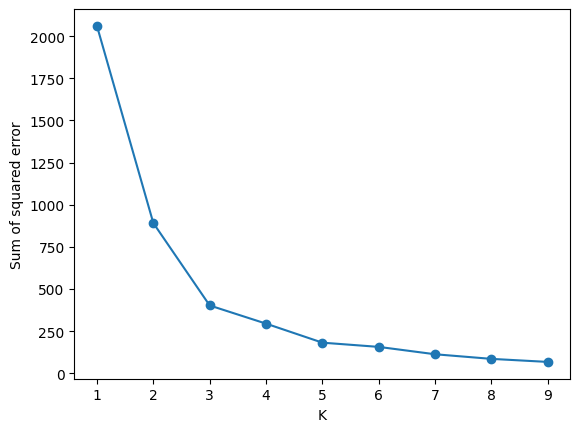

In [ ]:
#plotting to select best k
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse1, marker='o')

In [ ]:
#building k- mean clustering model
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Ever_Married']])
y_predicted

array([0, 0, 2, ..., 1, 0, 1], shape=(2627,), dtype=int32)

In [1623]:
df['cluster2']=y_predicted

C:\Users\london\AppData\Local\Temp\ipykernel_22208\1904769789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster2']=y_predicted


In [ ]:
#cheching centroids of cluster
km.cluster_centers_

array([[ 2.28239174e-02,  2.22044605e-15],
       [-4.31040283e-01, -1.00000000e+00],
       [ 1.22754359e+00, -3.89170897e-02]])

In [1625]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster2
0,-1.0,0.0,-0.217391,0.0,0.0,-0.333333,0.0,-0.5,0
1,0.0,0.0,-0.173913,0.0,0.6,2.333333,-2.0,1.0,0
2,-1.0,0.0,1.217391,-1.0,-0.4,-0.333333,0.0,-0.5,2
3,0.0,0.0,0.782609,-1.0,0.4,3.333333,-1.0,0.0,2
4,-1.0,-1.0,-0.956522,-1.0,1.2,0.000000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2622,0.0,-1.0,-0.521739,-1.0,0.6,2.666667,0.0,1.0,1
2623,-1.0,-1.0,-0.260870,0.0,-0.2,0.000000,0.0,-0.5,1
2624,-1.0,-1.0,0.521739,0.0,0.2,0.000000,0.0,0.0,1
2625,0.0,0.0,0.260870,0.0,0.4,0.000000,-1.0,1.5,0


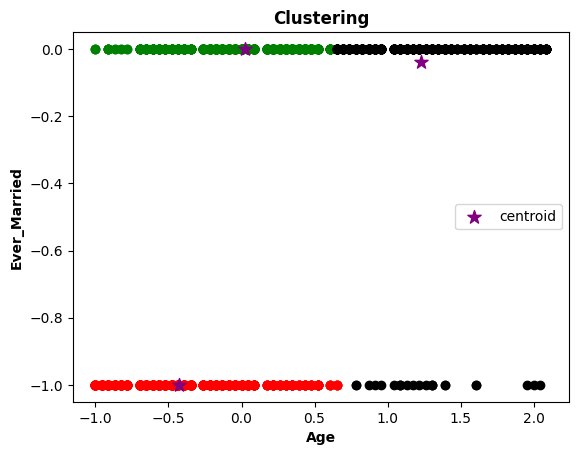

In [ ]:
df4 = df[df.cluster2==0]
df5 = df[df.cluster2==1]
df6 = df[df.cluster2==2]

plt.scatter(df4['Age'],df4['Ever_Married'],color='green')
plt.scatter(df5['Age'],df5['Ever_Married'],color='red')
plt.scatter(df6['Age'],df6['Ever_Married'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',s=100,label='centroid')

plt.xlabel('Age', fontweight='bold')
plt.ylabel('Ever_Married',fontweight='bold')
plt.title('Clustering',fontweight='bold')
plt.legend()

Text(0.5, 1.0, 'Scatter plot (Spending Score vs Age)')

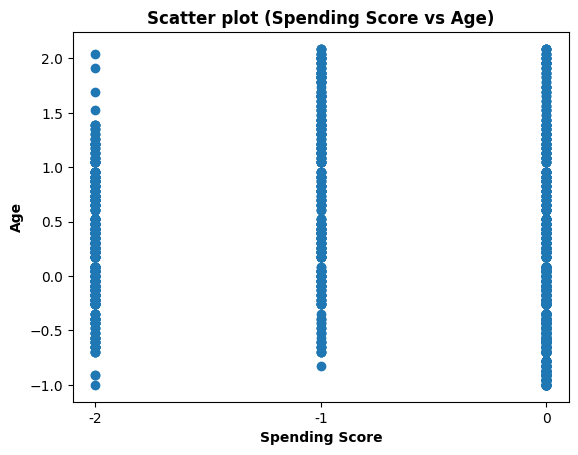

In [ ]:
#making scatter plot of Spending_Score, Age
plt.scatter(df.Spending_Score,df.Age)
plt.xlabel('Spending Score',fontweight='bold')
plt.ylabel('Age',fontweight='bold')
plt.xticks([-2,-1,0],[-2,-1,0])
plt.title('Scatter plot (Spending Score vs Age)',fontweight='bold')

In [ ]:

#selecting best k
sse2 = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['Spending_Score','Age']])
    sse2.append(km2.inertia_)

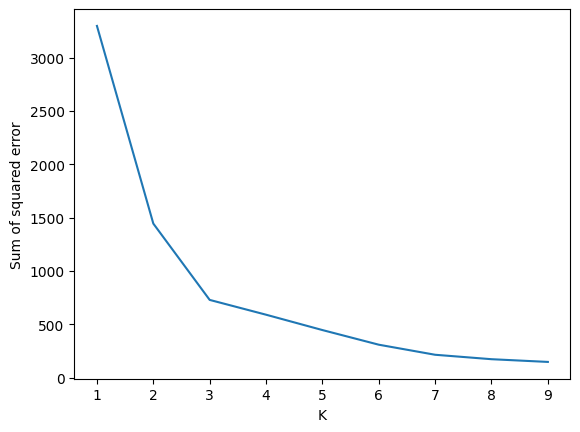

In [ ]:
#plottinf to select best k
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse2)

In [1632]:
km3 = KMeans(n_clusters=3)
df['cluster3']= km3.fit_predict(df[['Spending_Score','Age']])
df['cluster3']

0       0
1       1
2       2
3       2
4       0
       ..
2622    0
2623    0
2624    2
2625    1
2626    0
Name: cluster3, Length: 2627, dtype: int32

In [1633]:
km3.cluster_centers_

array([[-0.01879971, -0.35889214],
       [-1.8175853 ,  0.2484309 ],
       [-0.46680498,  1.26492874]])

Text(0.5, 1.0, 'Clustering')

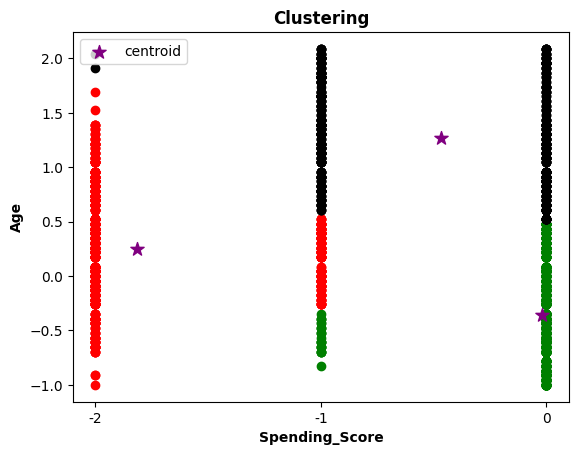

In [ ]:
df1 = df[df.cluster3==0]
df2 = df[df.cluster3==1]
df3 = df[df.cluster3==2]

plt.scatter(df1['Spending_Score'],df1['Age'],color='green')
plt.scatter(df2['Spending_Score'],df2['Age'],color='red')
plt.scatter(df3['Spending_Score'],df3['Age'],color='black')

plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='purple',marker='*',s=100,label='centroid')

plt.xlabel('Spending_Score', fontweight='bold')
plt.ylabel('Age',fontweight='bold')
plt.xticks([-2,-1,0],[-2,-1,0])
plt.legend(loc='upper left')
plt.title('Clustering',fontweight='bold')

In [1635]:
# pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
# X_pca = pca.fit_transform(x1)
#wanted_column1=['Gender','Age', M'Spending_Score','Family_Size']

In [1636]:
# pca = PCA(n_components=2)

# pca_scaled1 = pca.fit_transform(df[wanted_column1])

In [1637]:
# pca_scaled1=pd.DataFrame(pca_scaled1)
# pca_scaled1

In [1638]:
#pca.explained_variance_ratio_

In [1639]:
# sse = []
# k_rng = range(1,10)
# for k in k_rng:
#     km = KMeans(n_clusters=k)
#     km.fit(pca_scaled1)
#     sse.append(km.inertia_)

# plt.xlabel('K')
# plt.ylabel('Sum of squared error')
# plt.plot(k_rng,sse,marker='o')

In [1640]:
# km3 = KMeans(n_clusters=3)
# y_predicted2 = km3.fit_predict(pca_scaled1)
# y_predicted2

In [1641]:
#pca_scaled1['f_cluster']=y_predicted2

In [1642]:
#pca_scaled1

In [1643]:
#km3.cluster_centers_

In [1644]:
# ps1 = pca_scaled1[pca_scaled1.f_cluster==0]
# ps2 = pca_scaled1[pca_scaled1.f_cluster==1]
# ps3 = pca_scaled1[pca_scaled1.f_cluster==2]
# #ps4 = pca_scaled1[pca_scaled1.f_cluster==3]
# plt.scatter(ps1[0],ps1[1],color='green')
# plt.scatter(ps2[0],ps2[1],color='red')
# plt.scatter(ps3[0],ps3[1],color='blue')
# #plt.scatter(ps4[0],ps4[1],color='black')

# plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='black',marker='*', s=200,label='centroid')

In [1645]:
# dfa = df[df.cluster2==0]
# dfb = df[df.cluster2==1]
# dfc = df[df.cluster2==2]
# plt.scatter(df4['Spending_Score'],df4['Family_Size'],color='green')
# plt.scatter(df5['Spending_Score'],df5['Family_Size'],color='red')
# plt.scatter(df6['Spending_Score'],df6['Family_Size'],color='black')
# #plt.scatter(df7['Spending_Score'],df7['Family_Size'],color='blue')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# plt.xlabel('Spending_Score')
# plt.ylabel('Family_Size')
# plt.legend()

In [1646]:
# #Filling null with mode because of categorical features
# null_col=['Ever_Married','Graduated','Profession','Work_Experience','Family_Size']
# for col in null_col:
#     data[col]=data[col].fillna(data[col].mode()[0])#[0] to choose first mode if we have multiple modes.

In [ ]:
#checking how many priciple componenets needed to get 95% varaince
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
df_pca = pca.fit_transform(df[wanted_column])

print("Number of components selected:", pca.n_components_)

Number of components selected: 7


In [ ]:
#applying pca
pca = PCA(n_components=7)

pca_scaled = pca.fit_transform(df[wanted_column])
pca_scaled

array([[-0.44511589,  0.46706172, -1.01967848, ..., -0.2783914 ,
        -0.22805896,  0.16135393],
       [ 1.15725033, -1.62378855,  1.33522773, ...,  0.47420841,
         0.04805562,  0.71074193],
       [-0.88035033,  0.00310367, -1.33676739, ..., -0.41056878,
        -0.21691701, -1.15010428],
       ...,
       [-0.19643946,  0.47934882, -0.89555523, ..., -0.65357082,
        -0.09842472,  0.17736993],
       [-0.69260538, -0.00296079,  0.95083062, ..., -0.07615453,
         0.58765168,  0.45268159],
       [ 2.25313636, -0.42396072, -0.17915024, ..., -0.61334378,
        -0.13042896,  0.42505329]], shape=(2627, 7))

In [ ]:
#making data frame of pca scaled data
pca_scal=pd.DataFrame(pca_scaled)
pca_scal

,0,1,2,3,4,5,6
0,-0.445116,0.467062,-1.019678,-0.676231,-0.278391,-0.228059,0.161354
1,1.157250,-1.623789,1.335228,0.241716,0.474208,0.048056,0.710742
2,-0.880350,0.003104,-1.336767,0.192392,-0.410569,-0.216917,-1.150104
3,2.078103,-1.932252,-0.024074,0.993048,0.679315,-0.051712,-0.532180
4,0.309121,1.640367,0.510121,0.310322,0.015260,-0.970718,0.383025
...,...,...,...,...,...,...,...
2622,2.429974,0.137930,0.636363,0.712566,0.481485,0.098107,-0.140345
2623,0.055400,0.641844,-1.014234,-0.892316,-0.364191,-0.215375,0.108133
2624,-0.196439,0.479349,-0.895555,-0.018104,-0.653571,-0.098425,0.177370
2625,-0.692605,-0.002961,0.950831,0.450962,-0.076155,0.587652,0.452682


In [ ]:
#checking how much variance has been explained
pca.explained_variance_ratio_

array([0.30911434, 0.23452861, 0.17746984, 0.09504853, 0.06295085,
       0.06021296, 0.03746104])

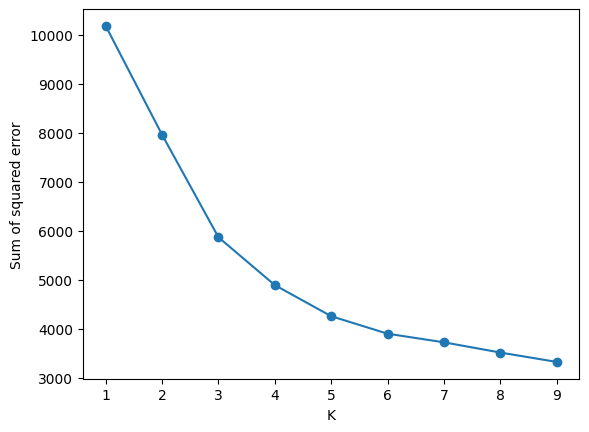

In [ ]:
#choosing best k
sse4 = []
k_rng = range(1,10)
for k in k_rng:
    km4= KMeans(n_clusters=k)
    km4.fit(pca_scaled)
    sse4.append(km4.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse4, marker='o')

In [ ]:
#making k-mean model 
kmp = KMeans(n_clusters=4)
y_pred = kmp.fit_predict(pca_scaled)


In [ ]:
##seeing centroids of the cluster
kmp.cluster_centers_

array([[ 2.44539895e-02,  1.01983262e+00, -3.20986701e-02,
        -1.61806644e-01, -2.71461106e-04, -6.23633397e-03,
         1.28914172e-02],
       [-8.68744440e-01, -7.60898584e-01,  6.68893312e-01,
        -2.73252828e-01,  4.97293641e-02, -6.01409652e-02,
         3.35114642e-02],
       [ 1.90110746e+00, -6.89045459e-01,  2.24269758e-02,
         8.00907241e-02, -1.42334583e-03,  1.47972542e-02,
        -9.15039788e-03],
       [-7.85978987e-01, -2.57976474e-01, -9.00639277e-01,
         6.25739048e-01, -6.80018840e-02,  8.18863817e-02,
        -6.35279638e-02]])

In [ ]:
#adding column in pca data frame for clustered data
pca_scal['f_cluster']=y_pred

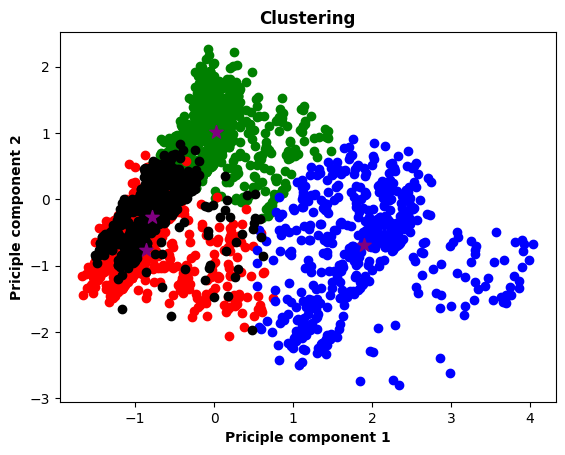

In [ ]:
#visualizing clusters with centroids. Since I have used only pca1 and pca2 ( pca1+pca2= 53 % variance) thus clusters are not separated
ps1 = pca_scal[pca_scal.f_cluster==0]
ps2 = pca_scal[pca_scal.f_cluster==1]
ps3 = pca_scal[pca_scal.f_cluster==2]
ps4 = pca_scal[pca_scal.f_cluster==3]
plt.scatter(ps1[0],ps1[1],color='green')
plt.scatter(ps2[0],ps2[1],color='red')
plt.scatter(ps3[0],ps3[1],color='blue')
plt.scatter(ps4[0],ps4[1],color='black')
plt.xlabel('Priciple component 1', fontweight='bold')
plt.ylabel('Priciple component 2', fontweight='bold')
plt.title('Clustering',fontweight='bold')

plt.scatter(kmp.cluster_centers_[:,0],kmp.cluster_centers_[:,1],color='purple',marker='*',s=100 ,label='centroid')

In [1661]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster2,cluster3
0,-1.0,0.0,-0.217391,0.0,0.0,-0.333333,0.0,-0.5,0,0
1,0.0,0.0,-0.173913,0.0,0.6,2.333333,-2.0,1.0,0,1
2,-1.0,0.0,1.217391,-1.0,-0.4,-0.333333,0.0,-0.5,2,2
3,0.0,0.0,0.782609,-1.0,0.4,3.333333,-1.0,0.0,2,2
4,-1.0,-1.0,-0.956522,-1.0,1.2,0.000000,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2622,0.0,-1.0,-0.521739,-1.0,0.6,2.666667,0.0,1.0,1,0
2623,-1.0,-1.0,-0.260870,0.0,-0.2,0.000000,0.0,-0.5,1,0
2624,-1.0,-1.0,0.521739,0.0,0.2,0.000000,0.0,0.0,1,2
2625,0.0,0.0,0.260870,0.0,0.4,0.000000,-1.0,1.5,0,1


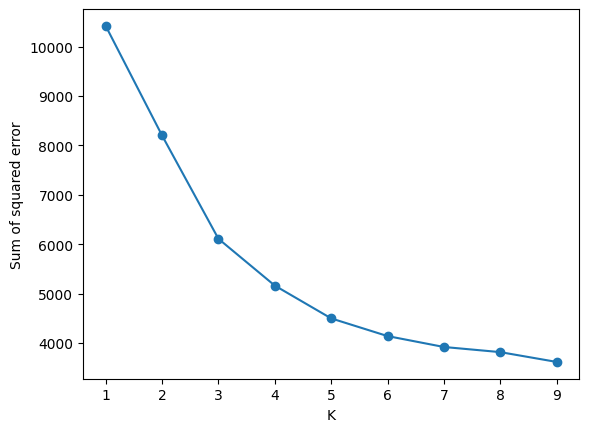

In [ ]:
#since pca took 7 components for 8 features thus trying to make kmean clustering model without using pca
sse = []
k_rng = range(1,10)
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df[wanted_column])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse, marker='o')

In [1676]:
kmf = KMeans(n_clusters=4)
df['clusterf'] = kmf.fit_predict(df[wanted_column])

In [1682]:
df['clusterf']

0       1
1       2
2       1
3       2
4       0
       ..
2622    2
2623    1
2624    1
2625    3
2626    2
Name: clusterf, Length: 2627, dtype: int32

Text(0.5, 1.0, 'Clustering')

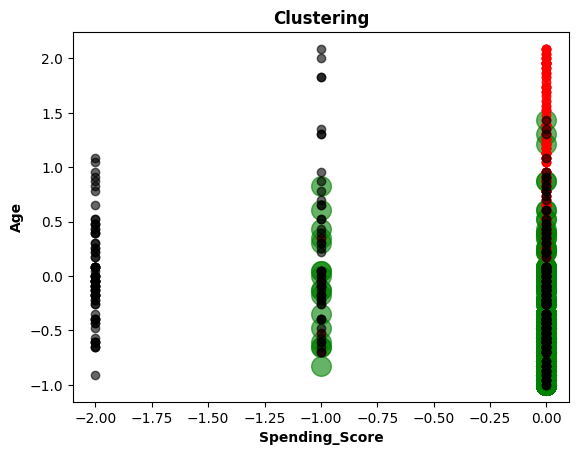

In [ ]:
df11 = df[df.clusterf==0]
df21 = df[df.clusterf==1]
df31 = df[df.clusterf==2]
df41 = df[df.cluster2==3]


plt.scatter(df11['Spending_Score'],df11['Age'],color='green',s=200 ,alpha= .6)
plt.scatter(df21['Spending_Score'],df21['Age'],color='red',alpha= 0.6)
plt.scatter(df31['Spending_Score'],df31['Age'],color='black',alpha= 0.6)
plt.scatter(df41['Spending_Score'],df41['Age'],color='blue',s=200)
#plt.scatter(kmf.cluster_centers_[:,0],kmf.cluster_centers_[:,1],color='purple',marker='*',s=100,label='centroid')
plt.xlabel('Spending_Score', fontweight='bold')
plt.ylabel('Age',fontweight='bold',)
plt.title('Clustering',fontweight='bold')

In [1684]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster2,cluster3,clusterf
0,-1.0,0.0,-0.217391,0.0,0.0,-0.333333,0.0,-0.5,0,0,1
1,0.0,0.0,-0.173913,0.0,0.6,2.333333,-2.0,1.0,0,1,2
2,-1.0,0.0,1.217391,-1.0,-0.4,-0.333333,0.0,-0.5,2,2,1
3,0.0,0.0,0.782609,-1.0,0.4,3.333333,-1.0,0.0,2,2,2
4,-1.0,-1.0,-0.956522,-1.0,1.2,0.000000,0.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2622,0.0,-1.0,-0.521739,-1.0,0.6,2.666667,0.0,1.0,1,0,2
2623,-1.0,-1.0,-0.260870,0.0,-0.2,0.000000,0.0,-0.5,1,0,1
2624,-1.0,-1.0,0.521739,0.0,0.2,0.000000,0.0,0.0,1,2,1
2625,0.0,0.0,0.260870,0.0,0.4,0.000000,-1.0,1.5,0,1,3
